In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [2]:
dataset = MNIST(root='./data', download=True, transform=ToTensor())

0it [00:00, ?it/s]

9920512it [04:26, 43767.83it/s]                             

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


9920512it [04:26, 37200.69it/s]
0it [00:00, ?it/s]

 57%|█████▋    | 16384/28881 [00:01<00:00, 43639.50it/s]
0it [00:00, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



 27%|██▋       | 442368/1648877 [00:11<00:30, 39563.93it/s]
32768it [00:13, 43639.50it/s]                           /s]
100%|█████████▉| 1646592/1648877 [00:46<00:00, 34441.97it/s]
1654784it [00:46, 31741.59it/s]                             

0it [00:00, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw




  0%|          | 0/4542 [00:01<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


image.shape torch.Size([1, 28, 28])
Label 5


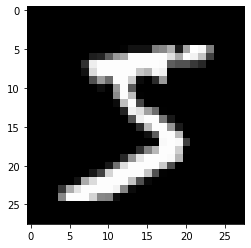

In [32]:
image, label = dataset[0]
print('image.shape', image.shape)
# plt.imshow(image.permute(1, 2, 0), cmap='gray')
plt.imshow(image.view(28, 28), cmap='gray')

print('Label', label)

In [20]:
a = torch.randn(1, 3, 3)
b = a.permute(1, 2, 0)
a, b

(tensor([[[-0.4680,  0.5038, -1.1558],
          [-0.2354, -0.9459,  2.0453],
          [ 1.1044,  0.8708, -0.4509]]]),
 tensor([[[-0.4680],
          [ 0.5038],
          [-1.1558]],
 
         [[-0.2354],
          [-0.9459],
          [ 2.0453]],
 
         [[ 1.1044],
          [ 0.8708],
          [-0.4509]]]))

`permute()` is used to Flatten out the size of the matrices.

In [21]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [36]:
for x, y in train_ds:
    print(x)
    print(y)
    break

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [22]:
batch_size = 128

In [23]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

images.shape torch.Size([128, 1, 28, 28])


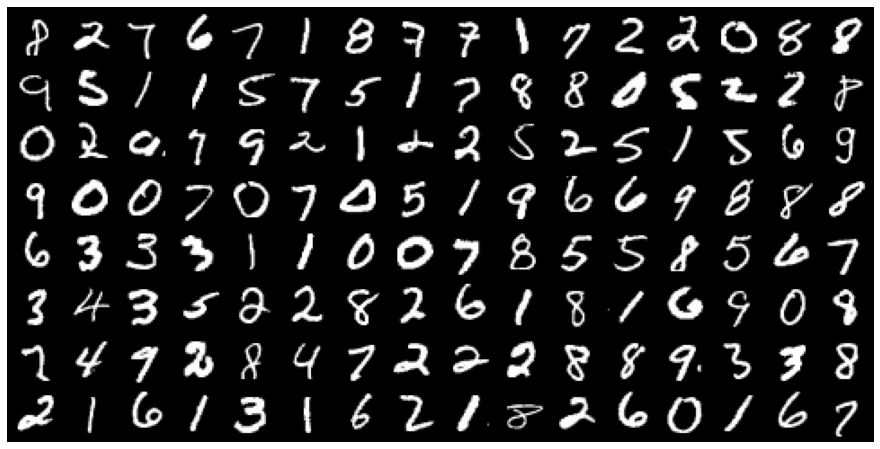

In [25]:
for images, _ in train_loader:
    print('images.shape', images.shape)
    plt.figure(figsize=(16, 8)) # 16 columns and 8 rows
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [38]:
for images, labels in train_loader:
    print('image.shape', image.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape', inputs.shape)
    break

image.shape torch.Size([1, 28, 28])
inputs.shape torch.Size([128, 784])


so the reason to do this type of conversion is to get the data in the following format

```
1 -> 0.1, 0.2, 0.3, ...... 784 pixel values 
2 -> 0.1, 0.2, 0.3, ...... 784 pixel values 
.     .    .    .   ......  . 
.     .    .    .   ......  . 
.     .    .    .   ......  . 
.     .    .    .   ......  .
```

which means that we have 128 images (one batch) of 784 pixel values as 784 columns. 

In [49]:
input_size = inputs.shape[-1]
hidden_size = 32

In [60]:
layer1 = nn.Linear(input_size, hidden_size)
layer1.weight.shape

torch.Size([32, 784])

In [51]:
inputs.shape

torch.Size([128, 784])

In [53]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape: ', layer1_outputs.shape)

layer1_outputs.shape:  torch.Size([128, 32])


In [58]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [62]:
F.relu(torch.tensor([[1, -1, 0], [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [64]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs): ', torch.min(layer1_outputs).item())
print('min(relu_outputs): ', torch.min(relu_outputs).item())
print('-'*40)
print('max(layer1_outputs): ', torch.max(layer1_outputs).item())
print('max(relu_outputs): ', torch.max(relu_outputs).item())

min(layer1_outputs):  -0.8001327514648438
min(relu_outputs):  0.0
----------------------------------------
max(layer1_outputs):  0.7842836976051331
max(relu_outputs):  0.7842836976051331


In [66]:
relu_outputs.shape

torch.Size([128, 32])

In [65]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [67]:
layer2_outputs = layer2(relu_outputs)
layer2_outputs.shape

torch.Size([128, 10])

In [68]:
inputs.shape

torch.Size([128, 784])

In [69]:
print(inputs.shape)
print(layer1_outputs.shape)
print(layer2_outputs.shape)

torch.Size([128, 784])
torch.Size([128, 32])
torch.Size([128, 10])


In [71]:
F.cross_entropy(layer2_outputs, labels) # To compute loss

tensor(2.3081, grad_fn=<NllLossBackward>)

In [79]:
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [81]:
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

# Model

In [123]:
class MNISTModel(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        self.linear1 = nn.Linear(in_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, out_size)
    
    def forward(self, xb):
        xb = xb.view(xb.size(0), -1)
        out = self.linear1(xb)
        out = F.relu(out)
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [124]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [125]:
input_size = 28*28
hidden_size = 32
num_classes = 10

In [91]:
model = MNISTModel(input_size, hidden_size = hidden_size, out_size=num_classes)

In [92]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [93]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('loss:', loss.item())
    print(type(loss))
    break
    
print(outputs.shape)
print(outputs[:2].data)

loss: 2.3045616149902344
<class 'torch.Tensor'>
torch.Size([128, 10])
tensor([[ 0.0638, -0.0240, -0.0525,  0.2440, -0.1175,  0.1606, -0.0994,  0.0610,
          0.0684,  0.0432],
        [ 0.0725,  0.1068,  0.0058,  0.1107, -0.1407,  0.1195, -0.0554,  0.0242,
          0.0533,  0.0432]])


# Using GPU

In [126]:
torch.cuda.is_available()

True

In [127]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [128]:
device = get_default_device()
device

device(type='cuda')

In [129]:
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [130]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cuda:0


In [131]:
class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)
    
    def __len__(self):
        return len(self.dl)

In [132]:
# yield Example
def even(numList):
    for i in numList:
        if i%2 == 0:
            yield i
for i in even([1, 2, 3, 4, 5]):
    print(i)

2
4


In [133]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [134]:
for xb, yb in val_loader:
    print(xb.device)
    print(yb)
    break

cuda:0
tensor([3, 1, 8, 3, 0, 3, 9, 5, 3, 9, 6, 9, 1, 3, 9, 9, 0, 0, 8, 2, 4, 2, 5, 7,
        0, 2, 3, 4, 5, 7, 8, 0, 8, 2, 8, 0, 6, 8, 8, 0, 6, 3, 1, 7, 1, 6, 5, 6,
        6, 4, 7, 4, 3, 3, 4, 8, 4, 2, 0, 7, 1, 3, 3, 2, 6, 2, 0, 8, 9, 2, 6, 2,
        1, 2, 2, 8, 8, 5, 9, 1, 0, 8, 9, 6, 4, 0, 3, 4, 2, 0, 9, 2, 4, 2, 0, 3,
        3, 8, 9, 8, 7, 5, 8, 2, 6, 0, 2, 1, 6, 6, 8, 5, 4, 5, 9, 8, 8, 1, 3, 1,
        1, 2, 2, 4, 7, 2, 7, 9, 8, 3, 9, 6, 8, 2, 4, 3, 8, 2, 7, 2, 8, 6, 6, 1,
        0, 8, 0, 7, 4, 1, 4, 7, 8, 0, 1, 8, 3, 2, 5, 2, 9, 1, 3, 1, 5, 6, 6, 7,
        5, 9, 7, 0, 8, 9, 0, 0, 0, 9, 7, 1, 3, 7, 6, 4, 1, 7, 1, 5, 0, 7, 5, 6,
        1, 1, 8, 2, 7, 6, 3, 3, 0, 2, 4, 6, 5, 7, 4, 7, 4, 9, 5, 0, 1, 1, 9, 6,
        8, 9, 4, 2, 4, 3, 2, 9, 6, 1, 9, 4, 7, 6, 4, 1, 9, 4, 3, 7, 4, 9, 5, 0,
        8, 0, 1, 7, 9, 8, 6, 0, 0, 7, 6, 1, 2, 9, 3, 0], device='cuda:0')


In [135]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [136]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [137]:
# Model on GPU
model = MNISTModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MNISTModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

we use `to_device()` method to ensure that both weights and biases are on the same device like GPU and CPU

In [138]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3152687549591064, 'val_acc': 0.11630859225988388}]

This is the initial random loss when did with random weights and biases

In [139]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2968, val_acc: 0.9089
Epoch [1], val_loss: 0.1826, val_acc: 0.9469
Epoch [2], val_loss: 0.2019, val_acc: 0.9381
Epoch [3], val_loss: 0.1333, val_acc: 0.9604
Epoch [4], val_loss: 0.1441, val_acc: 0.9582


In [140]:
history += fit(10, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1153, val_acc: 0.9682
Epoch [1], val_loss: 0.1154, val_acc: 0.9681
Epoch [2], val_loss: 0.1128, val_acc: 0.9689
Epoch [3], val_loss: 0.1133, val_acc: 0.9688
Epoch [4], val_loss: 0.1133, val_acc: 0.9667
Epoch [5], val_loss: 0.1122, val_acc: 0.9690
Epoch [6], val_loss: 0.1133, val_acc: 0.9665
Epoch [7], val_loss: 0.1115, val_acc: 0.9674
Epoch [8], val_loss: 0.1119, val_acc: 0.9672
Epoch [9], val_loss: 0.1123, val_acc: 0.9667


In [151]:
history += fit(5, 0.3, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1153, val_acc: 0.9683
Epoch [1], val_loss: 0.1139, val_acc: 0.9662
Epoch [2], val_loss: 0.1206, val_acc: 0.9664
Epoch [3], val_loss: 0.1153, val_acc: 0.9671
Epoch [4], val_loss: 0.1141, val_acc: 0.9687


Text(0.5, 1.0, 'loss vs no. of epochs')

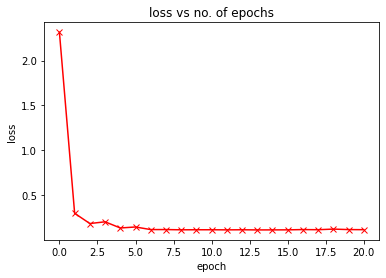

In [152]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-rx')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs no. of epochs')

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

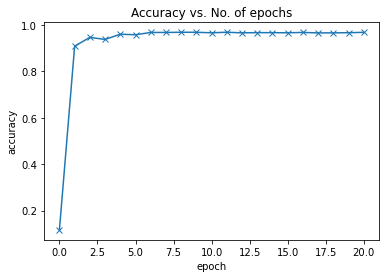

In [153]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [154]:
history

[{'val_loss': 2.3152687549591064, 'val_acc': 0.11630859225988388},
 {'val_loss': 0.2968009114265442, 'val_acc': 0.908886730670929},
 {'val_loss': 0.18262748420238495, 'val_acc': 0.9468749761581421},
 {'val_loss': 0.2018844187259674, 'val_acc': 0.9380859136581421},
 {'val_loss': 0.13329921662807465, 'val_acc': 0.96044921875},
 {'val_loss': 0.14414528012275696, 'val_acc': 0.958203136920929},
 {'val_loss': 0.11531567573547363, 'val_acc': 0.9681640863418579},
 {'val_loss': 0.11540495604276657, 'val_acc': 0.968066394329071},
 {'val_loss': 0.11275526136159897, 'val_acc': 0.968945324420929},
 {'val_loss': 0.11334138363599777, 'val_acc': 0.9688476324081421},
 {'val_loss': 0.11329056322574615, 'val_acc': 0.9666992425918579},
 {'val_loss': 0.11220335215330124, 'val_acc': 0.969042956829071},
 {'val_loss': 0.11325433105230331, 'val_acc': 0.966503918170929},
 {'val_loss': 0.11152297258377075, 'val_acc': 0.9673827886581421},
 {'val_loss': 0.11190295219421387, 'val_acc': 0.9671875238418579},
 {'val_l

In [155]:
len(history)

21

In [159]:
torch.save(model.state_dict(), 'model/mnist-neural-network-2.pth')

# Load

In [158]:
model2 = MNISTModel(input_size, hidden_size=hidden_size, out_size=num_classes)

In [160]:
model2.load_state_dict(torch.load('model/mnist-neural-network-2.pth'))

<All keys matched successfully>

In [161]:
model2.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.0051, -0.0120, -0.0271,  ...,  0.0349,  0.0269, -0.0274],
                      [ 0.0312, -0.0311, -0.0061,  ..., -0.0049, -0.0084, -0.0327],
                      [ 0.0233, -0.0215, -0.0011,  ...,  0.0160,  0.0210,  0.0062],
                      ...,
                      [ 0.0221, -0.0123,  0.0286,  ...,  0.0214,  0.0198,  0.0028],
                      [ 0.0132, -0.0281, -0.0039,  ...,  0.0055, -0.0214,  0.0251],
                      [ 0.0241,  0.0117,  0.0203,  ...,  0.0236, -0.0142,  0.0011]])),
             ('linear1.bias',
              tensor([ 0.0402,  0.0392,  0.0865, -0.0785,  0.1172,  0.3218,  0.1328, -0.0676,
                       0.1650, -0.1337, -0.3351,  0.3099, -0.0501, -0.0297,  0.2854,  0.4972,
                       0.3699,  0.3056,  0.1374, -0.0454, -0.2074, -0.2350, -0.0020, -0.3879,
                       0.2698,  0.2917, -0.0027, -0.0887,  0.1761,  0.1559,  0.0442,  0.3232])),
             ('linear2.we

# Testing with Individual Images

In [163]:
test_dataset = MNIST(root='./data', train=False, transform = ToTensor())

Label 7


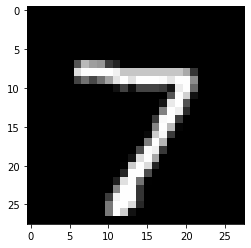

In [165]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print("Label", label)

In [171]:
def predict_image(img, model):
    xb = img.unsqueeze(0) # used to flatten the image
#     print(xb.shape)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [172]:
predict_image(img,model2)

7

Label:  0 Predicted:  0


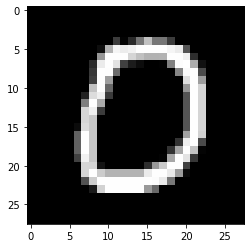

In [179]:
img, label = test_dataset[10]
plt.imshow(img.permute(1, 2, 0), cmap = 'gray')
print("Label: ", label, "Predicted: ", predict_image(img, model2))

In [209]:
def predict_series_images(test_dataset, max_count=10):
    OG_LABEL, PRED_LABEL = [], []
    for count, (img, label) in enumerate(test_dataset):
        if count < max_count:
            OG_LABEL.append(label)
            img = img.unsqueeze(0)
            yb = model2(img)
            _, preds = torch.max(yb, dim=1)
            PRED_LABEL.append(preds[0].item())       
    return torch.tensor(OG_LABEL), torch.tensor(PRED_LABEL)

In [245]:
og_label, pred_label = predict_series_images(test_dataset, max_count=25)
print(og_label)
print(pred_label)
print('accuracy: ', (torch.sum(og_label == pred_label)/len(og_label)).item())

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4])
accuracy:  1


In [246]:
testing_dl = DataLoader(test_dataset, batch_size)

In [247]:
for xb, yb in testing_dl:
    print(xb.shape)
    print(yb.shape)
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])


torch.Size([128, 1, 28, 28])


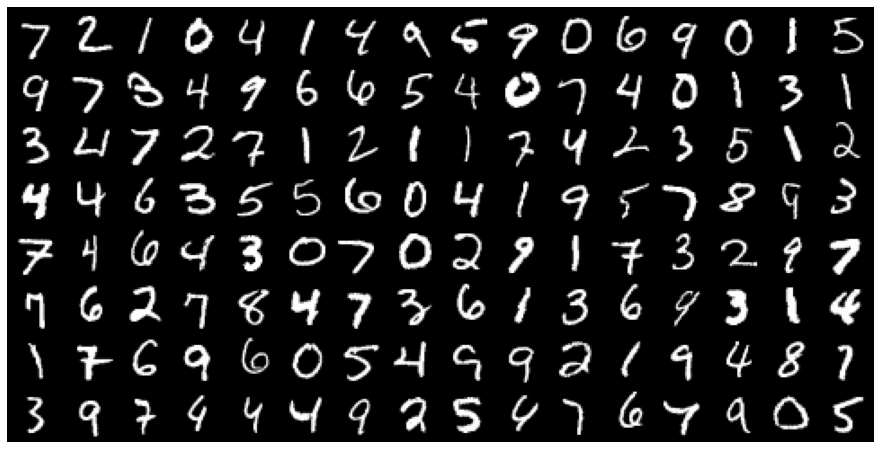

In [248]:
for images, _ in testing_dl:
    print(images.shape)
    plt.figure(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

In [249]:
import pandas as pd
import numpy as np
og_label, pred_label = og_label.numpy(), pred_label.numpy()

In [250]:
output_dataframe = pd.DataFrame({'Original Label': og_label[:], 'Predicted Label': pred_label[:]})
print(output_dataframe)
print(f"Accuracy: {(np.sum(og_label == pred_label)/ len(og_label)) * 100}%")

    Original Label  Predicted Label
0                7                7
1                2                2
2                1                1
3                0                0
4                4                4
5                1                1
6                4                4
7                9                9
8                5                5
9                9                9
10               0                0
11               6                6
12               9                9
13               0                0
14               1                1
15               5                5
16               9                9
17               7                7
18               3                3
19               4                4
20               9                9
21               6                6
22               6                6
23               5                5
24               4                4
Accuracy: 100.0%


In [238]:
print(evaluate(model2, testing_dl)) # for 128 images tho...

{'val_loss': 0.10419867187738419, 'val_acc': 0.9694422483444214}
